## Customer Churn Prediction of TELCO Company

#### Since lot  of customers are leaving this company, so as part of customer retention program we need to predict customer churn before they decide to leave.In order to do that we need to use this data and create machine learning model for customer churn prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_columns', 50)
df=pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

#### We have 7043 records with 21 different features including customer id and churn

In [3]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### As we can see that many features are of object type.So,we need to convert them into float or int type for which we need to perform encoding.

In [4]:
def changeCols(df):
    columnsNames=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
    for col in columnsNames:
        df[col]=df[col].astype('str').str.replace('Yes','1').replace('No','0').replace('No internet service','0').replace('No phone service',0)

changeCols(df)

df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [5]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,False,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0


#### There are some categorical values which can be encoded as numbers, so we will take a look at unique values present as categories and convert these fields as category and encode them.

In [6]:
print("Payment methods: ",df.PaymentMethod.unique())
print("Contract: ",df.Contract.unique())
print("Gender: ",df.gender.unique())
print("Senior Citizen: ",df.SeniorCitizen.unique())
print("Internet Service Types: ",df.InternetService.unique())




Payment methods:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Contract:  ['Month-to-month' 'One year' 'Two year']
Gender:  ['Female' 'Male']
Senior Citizen:  [False  True]
Internet Service Types:  ['DSL' 'Fiber optic' 'No']


#### Here we have encoded fields with numbers by pandas build-in get_dummies method.This method will generate new fields with prefix and category name as column name and 0 or 1 will be their value.
#### As we can see below, we got all the new fields with values as 0 or 1.

In [7]:
dfPaymentDummies = pd.get_dummies(df['PaymentMethod'], prefix = 'payment')
dfContractDummies = pd.get_dummies(df['Contract'], prefix = 'contract')
dfGenderDummies = pd.get_dummies(df['gender'], prefix = 'gender')
dfSeniorCitizenDummies = pd.get_dummies(df['SeniorCitizen'], prefix = 'SC')
dfInternetServiceDummies = pd.get_dummies(df['InternetService'], prefix = 'IS')


#### Now we have new dataframes by label encoding, so we will concat them with our existing dataframe, but before that we will remove category fields as we don't need them right!

In [8]:
df.drop(['gender','PaymentMethod','Contract','SeniorCitizen','InternetService'], axis=1, inplace=True)

df = pd.concat([df, dfPaymentDummies], axis=1)
df = pd.concat([df, dfContractDummies], axis=1)
df = pd.concat([df, dfGenderDummies], axis=1)
df = pd.concat([df, dfSeniorCitizenDummies], axis=1)
df = pd.concat([df, dfInternetServiceDummies], axis=1)
df.head(2)

,customerID,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,contract_Month-to-month,contract_One year,contract_Two year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber optic,IS_No
0,7590-VHVEG,1,0,1,0,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
1,5575-GNVDE,0,0,34,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0


In [9]:
print(df.isnull().sum())
#print(df['TotalCharges'].dtypes)

customerID                            0
Partner                               0
Dependents                            0
tenure                                0
PhoneService                          0
MultipleLines                         0
OnlineSecurity                        0
OnlineBackup                          0
DeviceProtection                      0
TechSupport                           0
StreamingTV                           0
StreamingMovies                       0
PaperlessBilling                      0
MonthlyCharges                        0
TotalCharges                         11
Churn                                 0
payment_Bank transfer (automatic)     0
payment_Credit card (automatic)       0
payment_Electronic check              0
payment_Mailed check                  0
contract_Month-to-month               0
contract_One year                     0
contract_Two year                     0
gender_Female                         0
gender_Male                           0


#### We can the the TOTAL CHARGES cokumn contains missing values.We can fill those values by using fillna method

In [10]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
#df.isnull().sum()

#### For a bit of simplicity, we'll rename some column names

In [12]:
df.columns = ['customerID', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No']

#### We'll convert all fields to number type in dataframe for our model.
#### Here we are wrapping up data preparation phase.

In [13]:
numericColumns=np.array(['Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn',
       'payment_Bank_transfer_auto', 'payment_Credit_card_auto',
       'payment_Electronic_check', 'payment_Mailed_check',
       'contract_Month_to_month', 'contract_One_year', 'contract_Two_year',
       'gender_Female', 'gender_Male', 'SC_False', 'SC_True', 'IS_DSL',
       'IS_Fiber_optic', 'IS_No'])

for columnName in numericColumns:
    df[columnName]=pd.to_numeric(df[columnName],errors='coerce')
df.dtypes

customerID                     object
Partner                         int64
Dependents                      int64
tenure                          int64
PhoneService                    int64
MultipleLines                   int64
OnlineSecurity                  int64
OnlineBackup                    int64
DeviceProtection                int64
TechSupport                     int64
StreamingTV                     int64
StreamingMovies                 int64
PaperlessBilling                int64
MonthlyCharges                float64
TotalCharges                  float64
Churn                           int64
payment_Bank_transfer_auto      uint8
payment_Credit_card_auto        uint8
payment_Electronic_check        uint8
payment_Mailed_check            uint8
contract_Month_to_month         uint8
contract_One_year               uint8
contract_Two_year               uint8
gender_Female                   uint8
gender_Male                     uint8
SC_False                        uint8
SC_True     

#### We are removing  customerID, as we won't be using that in our model development.

In [14]:
df1=df.drop(['customerID'],axis=1)
df1.head()

,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,contract_Month_to_month,contract_One_year,contract_Two_year,gender_Female,gender_Male,SC_False,SC_True,IS_DSL,IS_Fiber_optic,IS_No
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
1,0,0,34,1,0,1,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
2,0,0,2,1,0,1,1,0,0,0,...,1,0,0,0,1,1,0,1,0,0
3,0,0,45,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
4,0,0,2,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


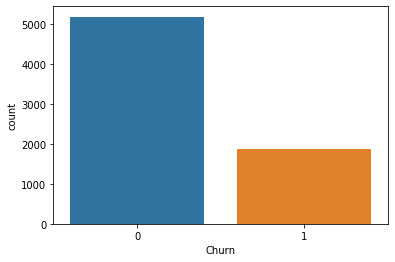

In [15]:
import seaborn as sns
sns.countplot(df1['Churn'])

#### The churn column is imbalanced i.e, we have many record of non churn customers and very few record of churn customers. So, we can make is balanced by taking class_weigth='balanced'

In [16]:
X=df1.iloc[:,df1.columns!='Churn']
y=df1['Churn']

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=100)

#### Before fitting data to our model, feature selection is very essential part of model development.
#### Here we are using sklearn's feature_selection . It will iteratively select most relevent features and eliminate least relevent features and threshold will be median for feature selection

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select=SelectFromModel(RandomForestClassifier(random_state=100,class_weight='balanced') )
select.fit(X_train,y_train)

X_train_s=select.transform(X_train)
X_test_s=select.transform(X_test)

import warnings
warnings.filterwarnings('ignore')

In [20]:
print('The shape of x_train: ',X_train.shape)
print('The shape of x_train_s: ',X_train_s.shape)

The shape of x_train:  (4930, 28)
The shape of x_train_s:  (4930, 6)


#### As we can see that we got 10relevant features out of 28 from our training data

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
score = lr.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Logistic Regression for customer churn: {:.3f}'.format(score))

The score of Logistic Regression for customer churn: 0.777


### Random Forest

In [32]:
from sklearn.linear_model import LogisticRegression
lr_rf=RandomForestClassifier()
score_rf = lr_rf.fit(X_train_s,y_train).score(X_test_s, y_test)
print('The score of Random Forest for customer churn: {:.3f}'.format(score_rf))

The score of Random Forest for customer churn: 0.764


### FINAL CONCLUSION : I have applied two models(Logistic regression and Random forest) on the dataset in which Logistic regression is giving the better result about 77% of score i.e, the model is 77% capable of classifying whether the customer will churn or not.